Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************

2024-06-18 22:27:52.190 | INFO     | alchemlyb.workflows.base:__init__:50 - Alchemlyb Version: f2.1.0
2024-06-18 22:27:52.191 | INFO     | alchemlyb.workflows.base:__init__:51 - Set Temperatu

<Axes: xlabel='Fraction of the simulation time', ylabel='$\\Delta G$ (kJ/mol)'>

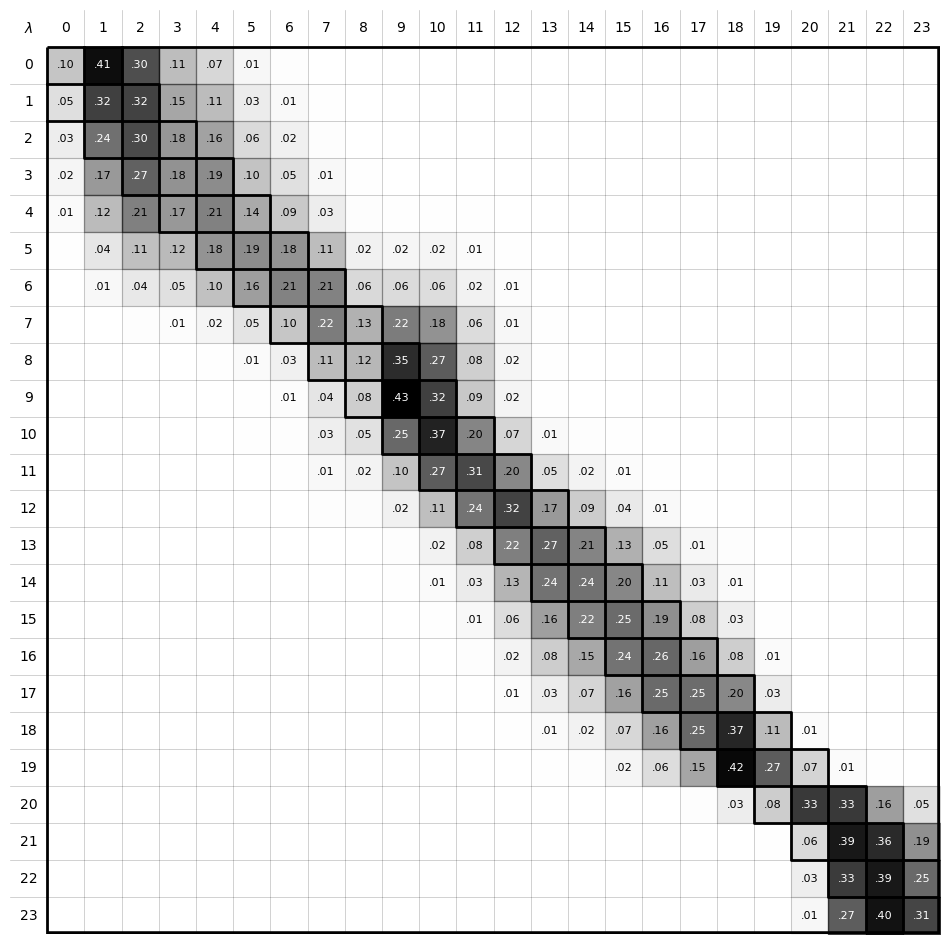

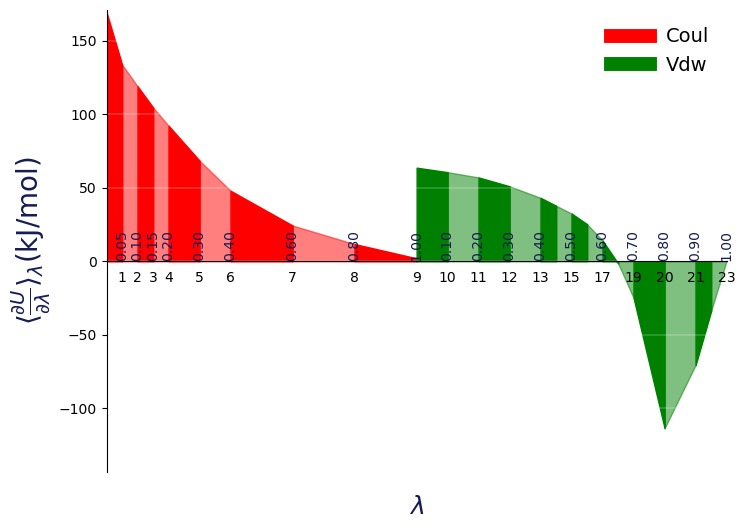

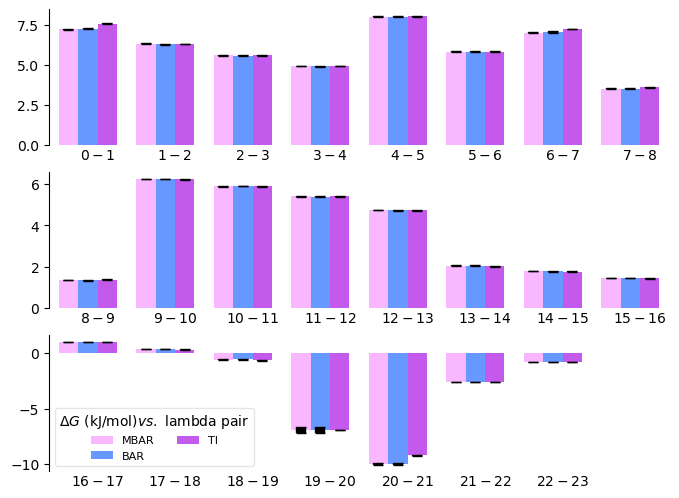

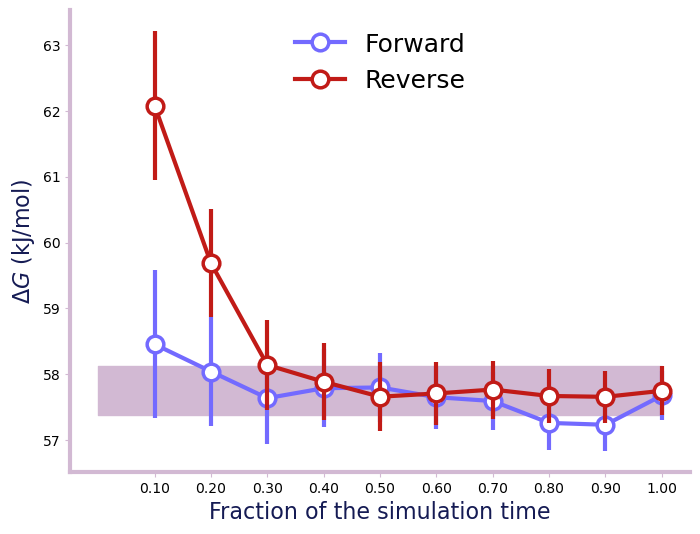

In [1]:
from alchemlyb.workflows import ABFE
import os
sys = '16'
dir = '/Users/estebancea/Library/CloudStorage/OneDrive-Personal/Doctorado/00_Trabajo/20_SAC/12_free_energy/MD/' + sys + '/xvg_files'
# Load the data
workflow = ABFE(software='GROMACS', dir=dir,
                 prefix='prd', suffix='xvg', T=303.2, outdirectory='./')
# Set the unit.
workflow.update_units('kJ/mol')
# Read the data
workflow.read()
# Decorrelate the data.
workflow.preprocess(skiptime=15000, uncorr='dhdl', threshold=50)
# Run the estimator
workflow.estimate(estimators=("MBAR", "BAR", "TI"))
# Retrieve the result
summary = workflow.generate_result()
# Plot the overlap matrix
workflow.plot_overlap_matrix(overlap='O_MBAR_' + sys + '.pdf')
# Plot the dHdl for TI
workflow.plot_ti_dhdl(dhdl_TI='dhdl_TI_' + sys + '.pdf')
# Plot the dF states
workflow.plot_dF_state(dF_state='dF_state_' + sys + '.pdf')
# Convergence analysis
workflow.check_convergence(10, dF_t='dF_t_' + sys + '.pdf')

In [2]:
                      MBAR  MBAR_Error        BAR  BAR_Error         TI  TI_Error
States 0 -- 1     7.075182    0.022815   7.059455   0.027830   7.088608  0.023249
       1 -- 2     6.338379    0.015224   6.344170   0.018502   6.333287  0.004926
       2 -- 3     5.640100    0.013421   5.646135   0.019702   5.618136  0.005098
       3 -- 4     4.970199    0.013301   4.964611   0.019886   4.950630  0.005334
       4 -- 5     8.069327    0.026997   8.057650   0.036562   8.090773  0.011781
       5 -- 6     5.893869    0.026610   5.897718   0.033848   5.930314  0.013543
       6 -- 7     7.137422    0.037922   7.191652   0.046779   7.429181  0.023062
       7 -- 8     3.510024    0.017631   3.531417   0.025615   3.625015  0.014160
       8 -- 9     1.322535    0.009802   1.314563   0.014294   1.335038  0.011867
       9 -- 10    6.223681    0.009921   6.228435   0.011960   6.220957  0.014034
       10 -- 11   5.874724    0.011128   5.879451   0.013208   5.862244  0.014418
       11 -- 12   5.381492    0.013241   5.368292   0.015502   5.351247  0.016645
       12 -- 13   4.724274    0.014590   4.706762   0.018293   4.683944  0.019284
       13 -- 14   2.045416    0.007990   2.037173   0.010308   2.043068  0.010885
       14 -- 15   1.778390    0.008969   1.782379   0.011738   1.779481  0.012169
       15 -- 16   1.445737    0.011028   1.452855   0.014558   1.436284  0.013250
       16 -- 17   1.002706    0.014484   0.993988   0.018402   0.982793  0.014385
       17 -- 18   0.368195    0.020576   0.369620   0.023732   0.329243  0.014060
       18 -- 19  -0.616567    0.036603  -0.601717   0.038885  -0.690026  0.014501
       19 -- 20  -6.866182    0.171576  -6.878144   0.180618  -6.978664  0.028286
       20 -- 21 -10.010663    0.061243  -9.978904   0.066432  -9.170317  0.018853
       21 -- 22  -2.624144    0.010766  -2.612054   0.012617  -2.611190  0.004981
       22 -- 23  -0.838086    0.009857  -0.844113   0.011161  -0.850221  0.004100
Stages coul      49.957037    0.111384  50.007373   0.088005  50.400981  0.053995
       vdw        7.888973    0.234632   7.904022   0.046321   8.388843  0.079446
       TOTAL     57.846010    0.259582  57.911395   0.220258  58.789824  0.096058

SyntaxError: invalid syntax (2433889058.py, line 1)